# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


## 1. Loading and displaying data + initial model training

### Loading & displaying data

In [1]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('sign_mnist_train.csv')
test_data = pd.read_csv('sign_mnist_test.csv')

In [2]:
# View basic information of the data
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 214.7 MB
None


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,157,157,157,157,157,158,158,...,149,163,175,175,175,175,175,149,149,149
2,2,187,188,188,188,188,188,188,188,188,...,202,201,200,199,199,199,198,195,195,195
3,2,211,211,212,212,212,212,212,212,211,...,235,234,233,231,230,229,229,229,229,163
4,13,164,167,170,172,176,179,180,184,185,...,133,163,163,163,164,179,179,179,179,179


We can see each row contains 1024 pixels value (32*32 image pixels) and the corresponding label

In [3]:
# View the labels of dataset
labels = train_data['label'].unique()
labels.sort()
labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

We can see the dataset does not contains 9 and 25 which is 'J' and 'Z', now we display one sample image for each class

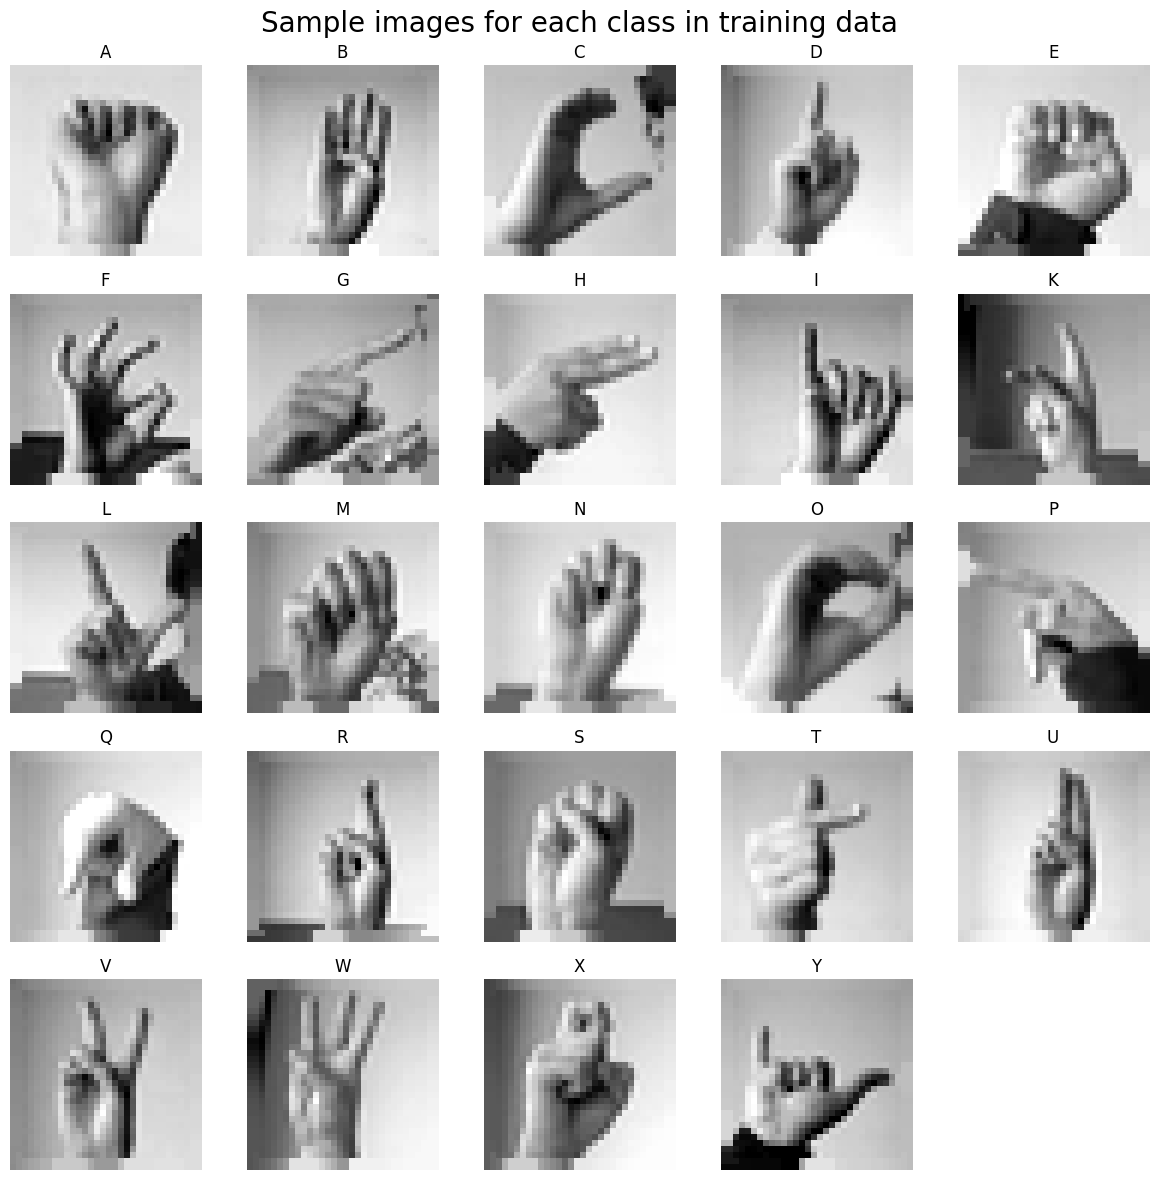

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Extract labels and pixel values
train_labels = train_data['label']
test_labels = test_data['label']
train_images = train_data.drop(columns=['label']).values

# Reshape the images from 1D to 2D (32x32)
train_images = train_images.reshape(-1, 32, 32)

# Display a sample of each letter in the training dataset
unique_labels = np.unique(train_labels)
fig, axes = plt.subplots(5, 5, figsize=(12, 12))

plt.suptitle("Sample images for each class in training data", fontsize=20)

for i, label in enumerate(unique_labels):
    ax = axes[i // 5, i % 5]
    # Find the first image corresponding to the label
    img_index = np.where(train_labels == label)[0][0]
    ax.imshow(train_images[img_index], cmap='gray')
    ax.set_title(chr(label + 65))  # Convert label to corresponding letter
    ax.axis('off')

# Hide the remaining empty axes
for j in range(i + 1, 25):
    ax = axes[j // 5, j % 5]
    ax.axis('off')

plt.tight_layout()
plt.show()

Here we roughly see the distribution for each class

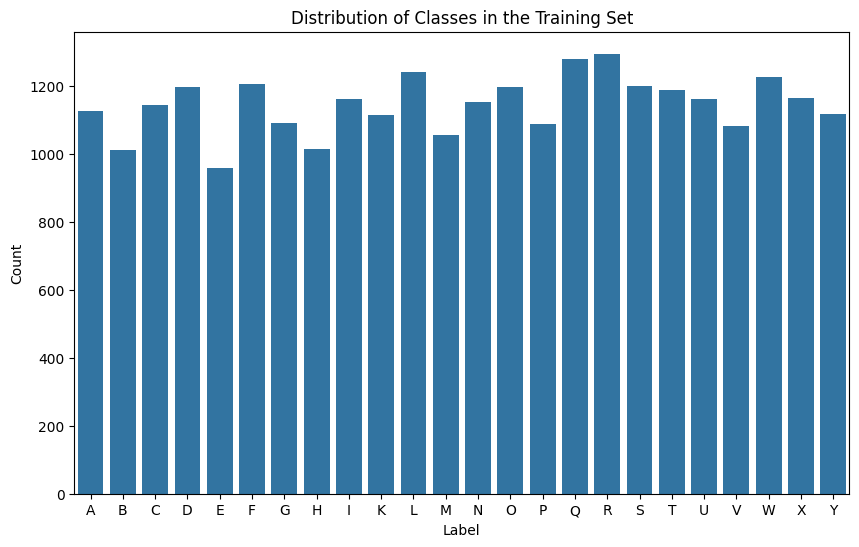

In [5]:
import seaborn as sns

# Plot the distribution of classes in the training set
plt.figure(figsize=(10, 6))
sns.countplot(x=train_labels)
plt.title('Distribution of Classes in the Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(ticks=np.arange(0, 24), labels=[chr(i + 65) for i in unique_labels])
plt.show()

We can see the distribution of each class for the training dataset is quite balanced, all the class has around 1000 to 1200 images, so we don't have to apply any upsampling or downsampling to the training data. Now we can prepare the training and test data.

In [6]:
# Get labels and images
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

Notice that the label 9 and label 25 is missing so here in the data preprocessing I shift the label after 8 to one index smaller. The reason is I will use categorical cross-entropy as the loss function and this loss function requires continuous integers without gap, besides when I encode the label using one-hot encoding, they also need continuous range.

There have some other preprocess steps:
- reshape the 1024 pixels to 32*32 matrix, so we can treat it as image instead of a seqential of values
- normalize the pixel value by /255, since many deep learning models perform better when the input values are small and center around zero, large input can cause issues with numerical stability, leading to problems like exploding or vanishing graidents, which may hinder or slow down the training process.
- one hot encoding: although the label we have are already numerical value, but to avoid ordianl relationship. I fwe simply label the class with integers, the model might mistakenly interpret these numbers as having some order or hierarchy. One hot encoding removes the risk by representing each class as a binary vector. Besides, one hot encoding is used to facilitate categorical cross-entropy loss function.

After preprocess the data, we need to split the data, since we are told to have a fixed validation data using only supplied test.csv file, we split the data in testing dataset into 50:50 for validation and test to provide independent data and unbiased accuracy later. In addtion, I use stratify when spliting to make sure that both dataset has same distribution of class label.

In [7]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Define a function for preprocessing
def preprocess_data(X, y):
    # Adjust labels to be in range 0-23
    y = np.array([i if i < 9 else i - 1 for i in y])
    
    # Reshape images to 32x32x1
    X = X.reshape(-1, 32, 32, 1)
    
    # Normalize pixel values
    X = X / 255.0
    
    # One-hot encode labels
    y_enc = to_categorical(y, num_classes=24)
    
    return X, y_enc

# Preprocess training data
X_train, y_train = preprocess_data(X_train, y_train)

# Preprocess testing data and create validation and final test sets
X_test, y_test = preprocess_data(X_test, y_test)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, stratify=y_test, 
                                                test_size=0.5, random_state=42)

### Training baseline model

Now we have our dataset ready to use, we can train both densely connected and CNN model as the baseline models.

But before that, I implement a function that can set the random seed so we can reproduce the same result every time we run.

In [8]:
import random
import tensorflow as tf

def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()

set_seed(42)

For the base DNN, we simply create a three layer DNN, and use adam optimizer with default learning rate and batch size

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Define the densely connected base model
dnn_base = Sequential([
    Flatten(input_shape=(32, 32, 1), name='flatten_1'),
    Dense(128, activation='relu', name='dense_1'),
    Dense(24, activation='softmax', name='dense_2')
], name='DNN_base')

dnn_base.summary()

c:\Users\billz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "DNN_base"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,296 (524.59 KB)

 Trainable params: 134,296 (524.59 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
# Compile the model
set_seed(42)
dnn_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MLP base model
history_dense = dnn_base.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.2131 - loss: 2.7211 - val_accuracy: 0.4696 - val_loss: 1.8147
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5388 - loss: 1.5417 - val_accuracy: 0.5708 - val_loss: 1.4451
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6500 - loss: 1.1563 - val_accuracy: 0.6171 - val_loss: 1.2749
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7103 - loss: 0.9496 - val_accuracy: 0.6316 - val_loss: 1.1961
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7532 - loss: 0.8121 - val_accuracy: 0.6433 - val_loss: 1.1554
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7879 - loss: 0.7076 - val_accuracy: 0.6517 - val_loss: 1.1382
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8136 - loss: 0.6234 - val_accuracy: 0.6590 - val_loss: 1.1324
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8371 - loss: 0.5525 - val_accuracy: 0.

In order to view the training process clearer, we plot the history accuracy and loss for both training and validation

In [11]:
# Plot the learning curve
def plot_learning_curve(history):
    # Summarize history for accuracy
    plt.figure(figsize=(14, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    plt.show()

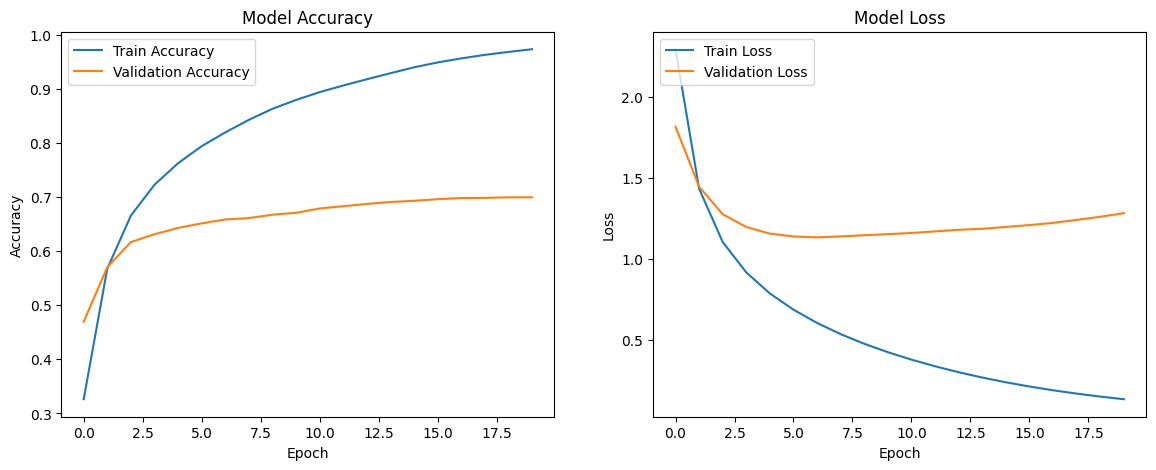

In [106]:
# Plot MLP base curve
plot_learning_curve(history_dense)

For the base CNN, we use 2 pairs of conv+pooling stack and 2 dense layer

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

# Define the CNN base model
cnn_base = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1), name='conv_1'),
    MaxPooling2D((2, 2), name='max_pool_1'),
    Conv2D(16, (3, 3), activation='relu', name='conv_2'),
    MaxPooling2D((2, 2), name='max_pool_2'),
    Flatten(name='flatten_1'),
    Dense(64, activation='relu', name='dense_1'),
    Dense(24, activation='softmax', name='dense_2')
], name='CNN_base')

cnn_base.summary()

c:\Users\billz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_base"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_1 (Conv2D)                 │ (None, 30, 30, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_1 (MaxPooling2D)       │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_2 (Conv2D)                 │ (None, 13, 13, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pool_2 (MaxPooling2D)       │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         1,560 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,968 (160.03 KB)

 Trainable params: 40,968 (160.03 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Compile the model
set_seed(42)
cnn_base.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn = cnn_base.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3687 - loss: 2.1998 - val_accuracy: 0.7538 - val_loss: 0.7147
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9191 - loss: 0.2754 - val_accuracy: 0.8840 - val_loss: 0.3750
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9900 - loss: 0.0431 - val_accuracy: 0.8901 - val_loss: 0.3760
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9971 - loss: 0.0102 - val_accuracy: 0.9152 - val_loss: 0.3609
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9986 - loss: 0.0065 - val_accuracy: 0.9091 - val_loss: 0.4875
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9985 - loss: 0.0045 - val_accuracy: 0.9124 - val_loss: 0.5167
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9030 - val_loss: 0.5473
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 2.6010e-04 - val_accuracy

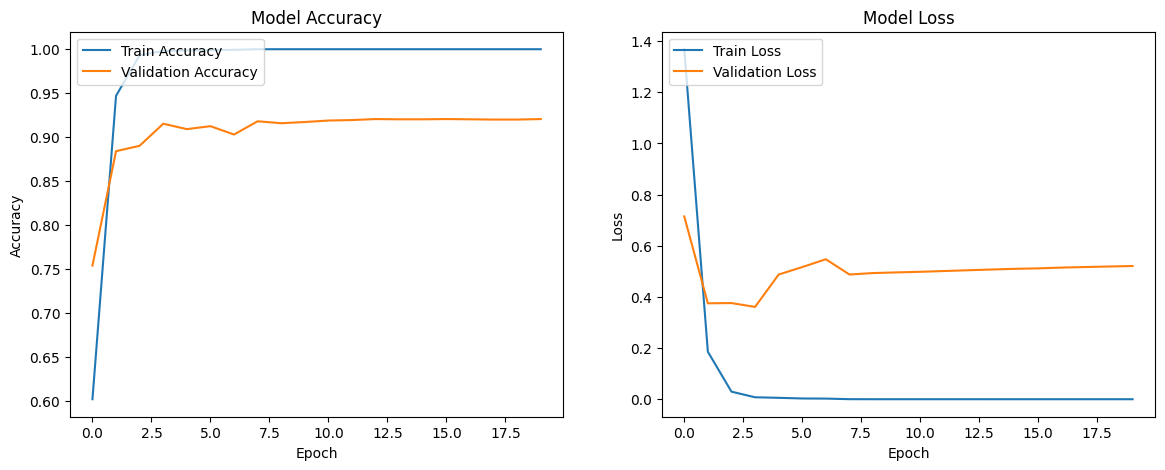

In [96]:
# Plot CNN base curve
plot_learning_curve(history_cnn)

Here we define a fucntion that record and report the following metrics:
- validation accuracy
- unbiased median accuracy
- overall mean accuracy
- letters with highest/lowest accuracy
- individual accuracy for each letter
- most common errors the model made

In [15]:
from sklearn.metrics import confusion_matrix

def accuracy_per_class(y_true, y_pred):
    accuracies = []
    for i in range(24):
        if np.sum(y_true == i) > 0:
            accuracies.append(np.mean(y_pred[y_true == i] == i))
        else:
            print("nan")
            accuracies.append(np.nan) # Handle classes with no samples

    # Filter out NaN values to calculate the median accuracy
    accuracies = [acc for acc in accuracies if not np.isnan(acc)]

    return accuracies

def max_min_accuracy(accuracies):
    # Identify the letters with the highest/lowest individual accuracy
    max_accuracy = np.nanmax(accuracies)
    min_accuracy = np.nanmin(accuracies)

    # Find all classes with the highest accuracy
    highest_accuracy_classes = np.where(accuracies == max_accuracy)[0]
    highest_accuracy_letters = [chr(i + ord('A') + (1 if i >= 9 else 0)) for i in highest_accuracy_classes]

    # Find all classes with the lowest accuracy
    lowest_accuracy_classes = np.where(accuracies == min_accuracy)[0]
    lowest_accuracy_letters = [chr(i + ord('A') + (1 if i >= 9 else 0)) for i in lowest_accuracy_classes]

    # Print the results
    print(f"Letters with Highest Accuracy: {', '.join(highest_accuracy_letters)}")
    print(f"Letters with Lowest Accuracy: {', '.join(lowest_accuracy_letters)}\n")

def most_common_errors(y_true, y_pred):
    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Set diagonal to zero to exclude correct classifications
    np.fill_diagonal(conf_matrix, 0)

    # Flatten confusion matrix and sort indices by error count in descending order
    flat_conf_matrix = conf_matrix.flatten()
    sorted_indices = np.argsort(-flat_conf_matrix)

    # Get top non-zero errors
    top_errors_indices = sorted_indices[flat_conf_matrix[sorted_indices] > 0][:3]
    top_errors = flat_conf_matrix[top_errors_indices]
    top_positions = np.unravel_index(top_errors_indices, conf_matrix.shape)

    # Adjust for missing 'J' and convert indices to letters
    def index_to_letter(idx):
        return chr(idx + ord('A') + 1) if idx >= 9 else chr(idx + ord('A'))

    # Print top errors
    if top_errors.size == 0:
        print("No errors detected, the model is perfect")
    else:
        print("Top errors:")
        for i in range(len(top_errors)):
            print(f"* Predict {index_to_letter(top_positions[0][i])} as {index_to_letter(top_positions[1][i])}")
        if len(top_errors) < 3:
            print(f"Only {len(top_errors)} errors detected\n")

def evaluate_model(model_name, model, X_val, y_val):
    model_evaluation = model.evaluate(X_val, y_val, verbose = 0)
    print(f"{model_name} model:\n\nValidation Accuracy: {model_evaluation[1]:.4f}")

    # More evaluation of the model
    y_pred = np.argmax(model.predict(X_val, verbose = 0), axis=1) # calculate y_pred
    y_true = np.argmax(y_val, axis=1) # calculate the ground truth

    # Get the accuracy list
    accuracies = accuracy_per_class(y_true, y_pred)

    # Show unbiased median accuracy
    median_accuracy = np.median(accuracies)
    print(f"Unbiased Median Accuracy: {median_accuracy:.4f}\n")

    # Show letter with max and min accuracy
    max_min_accuracy(accuracies)

    # Show most common errors
    most_common_errors(y_true, y_pred)

    # Show accuracy for each individual letter
    mean_accuracy = np.nanmean(accuracies)
    print(f"Overall Mean Accuracy: {mean_accuracy:.4f}\n")

    # Print each letter and its accuracy
    letters = [chr(i + ord('A')) for i in range(26) if i not in [9, 25]]
    for i, acc in enumerate(accuracies):
        print(f"Letter {letters[i]}: Accuracy {acc:.4f}")


In [107]:
# Evaluate the MLP base model
evaluate_model("Densely connected base", dnn_base, X_val, y_val)

Densely connected base model:

Validation Accuracy: 0.6999
Unbiased Median Accuracy: 0.6594

Letters with Highest Accuracy: A
Letters with Lowest Accuracy: S

Top errors:
* Predict M as E
* Predict S as I
* Predict B as W
Overall Mean Accuracy: 0.6893

Letter A: Accuracy 1.0000
Letter B: Accuracy 0.7037
Letter C: Accuracy 0.9419
Letter D: Accuracy 0.9016
Letter E: Accuracy 0.9518
Letter F: Accuracy 0.8952
Letter G: Accuracy 0.7126
Letter H: Accuracy 0.7523
Letter I: Accuracy 0.7569
Letter K: Accuracy 0.4485
Letter L: Accuracy 0.9135
Letter M: Accuracy 0.4365
Letter N: Accuracy 0.4276
Letter O: Accuracy 0.5610
Letter P: Accuracy 0.9713
Letter Q: Accuracy 0.6829
Letter R: Accuracy 0.5833
Letter S: Accuracy 0.3333
Letter T: Accuracy 0.6210
Letter U: Accuracy 0.5940
Letter V: Accuracy 0.6358
Letter W: Accuracy 0.6019
Letter X: Accuracy 0.5075
Letter Y: Accuracy 0.6084


In [99]:
# Evaluate the CNN base model
evaluate_model("CNN base", cnn_base, X_val, y_val)

CNN base model:

Validation Accuracy: 0.9205
Unbiased Median Accuracy: 0.9242

Letters with Highest Accuracy: A, B, F, L, W, X
Letters with Lowest Accuracy: T

Top errors:
* Predict T as H
* Predict H as G
* Predict T as X
Overall Mean Accuracy: 0.9194

Letter A: Accuracy 1.0000
Letter B: Accuracy 1.0000
Letter C: Accuracy 0.9419
Letter D: Accuracy 0.9016
Letter E: Accuracy 0.9438
Letter F: Accuracy 1.0000
Letter G: Accuracy 0.9310
Letter H: Accuracy 0.8624
Letter I: Accuracy 0.9097
Letter K: Accuracy 0.9030
Letter L: Accuracy 1.0000
Letter M: Accuracy 0.8731
Letter N: Accuracy 0.8552
Letter O: Accuracy 0.8780
Letter P: Accuracy 0.9885
Letter Q: Accuracy 0.9634
Letter R: Accuracy 0.8611
Letter S: Accuracy 0.9837
Letter T: Accuracy 0.5565
Letter U: Accuracy 0.9173
Letter V: Accuracy 0.8786
Letter W: Accuracy 1.0000
Letter X: Accuracy 1.0000
Letter Y: Accuracy 0.9157


Observation for base model:
- The training accuracy for both model are near perfect, but the validation accuracy for DNN is only around 70% while CNN is around 92%, indicating the models are suffering from overfitting issue currently.
- The unbiased median accuracy for both model has not meet client requirement yet
- There have some individual letters have low accuracy

## 2. Optimization of both base models

### Optimize densely connected model

#### Try different architecture

Firstly we try different architectures to see which one works better, dur to the time limit, there are three architecture we will try:
- A deeper DNN with three hidden layers
- A relatively more shallow DNN with two hidden layers
- A simple DNN with only one hidden layer
The optimizer here we still use adam with default learning rate

In [126]:
def create_dnn_model(neurons_per_layer, activation='relu', kernel_initializer='glorot_uniform'):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 1), name='flatten'))
    
    for i, neurons in enumerate(neurons_per_layer):
        model.add(Dense(neurons, activation=activation, kernel_initializer=kernel_initializer, name=f'dense_{i+1}'))
    
    model.add(Dense(24, activation='softmax', kernel_initializer=kernel_initializer, name='output'))
    
    return model

In [114]:
# Define different architecture to compare
architectures = [[256, 128, 64], [256, 128], [256]]

# Store histories for comparison
histories = {}

# Loop through each architectures
for arch in architectures:
    optimizer = SGD(learning_rate=lr)
    set_seed(42)
    model = create_dnn_model(arch)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print(f"Model parameters: {model.count_params()}")
    
    history = model.fit(
        X_train, y_train,
        epochs=20,
        validation_data=(X_val, y_val)
    )
    
    # Store history
    histories[f"architecture_{arch}"] = history

Model parameters: 305112
Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1566 - loss: 2.7700 - val_accuracy: 0.4629 - val_loss: 1.7242
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5499 - loss: 1.3391 - val_accuracy: 0.6076 - val_loss: 1.2165
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7186 - loss: 0.8053 - val_accuracy: 0.6620 - val_loss: 1.0761
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8212 - loss: 0.5164 - val_accuracy: 0.6899 - val_loss: 1.0743
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8899 - loss: 0.3307 - val_accuracy: 0.7197 - val_loss: 1.0652
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9281 - loss: 0.2137 - val_accuracy: 0.7552 - val_loss: 1.0253
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9559 - loss: 0.1434 - val_accuracy: 0.7501 - val_loss: 1.1580
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9559 - loss: 

In [115]:
import matplotlib.pyplot as plt

def plot_comparison(histories):
    plt.figure(figsize=(14, 12))
    
    # Plot Training Accuracy
    plt.subplot(2, 2, 1)
    for key, history in histories.items():
        epochs = range(1, len(history.history['accuracy']) + 1)
        plt.plot(epochs, history.history['accuracy'], label=f'{key}')
    plt.title('Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot Validation Accuracy
    plt.subplot(2, 2, 2)
    for key, history in histories.items():
        epochs = range(1, len(history.history['val_accuracy']) + 1)
        plt.plot(epochs, history.history['val_accuracy'], label=f'{key}')
    plt.title('Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot Training Loss
    plt.subplot(2, 2, 3)
    for key, history in histories.items():
        epochs = range(1, len(history.history['loss']) + 1)
        plt.plot(epochs, history.history['loss'], label=f'{key}')
    plt.title('Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Plot Validation Loss
    plt.subplot(2, 2, 4)
    for key, history in histories.items():
        epochs = range(1, len(history.history['val_loss']) + 1)
        plt.plot(epochs, history.history['val_loss'], label=f'{key}')
    plt.title('Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()


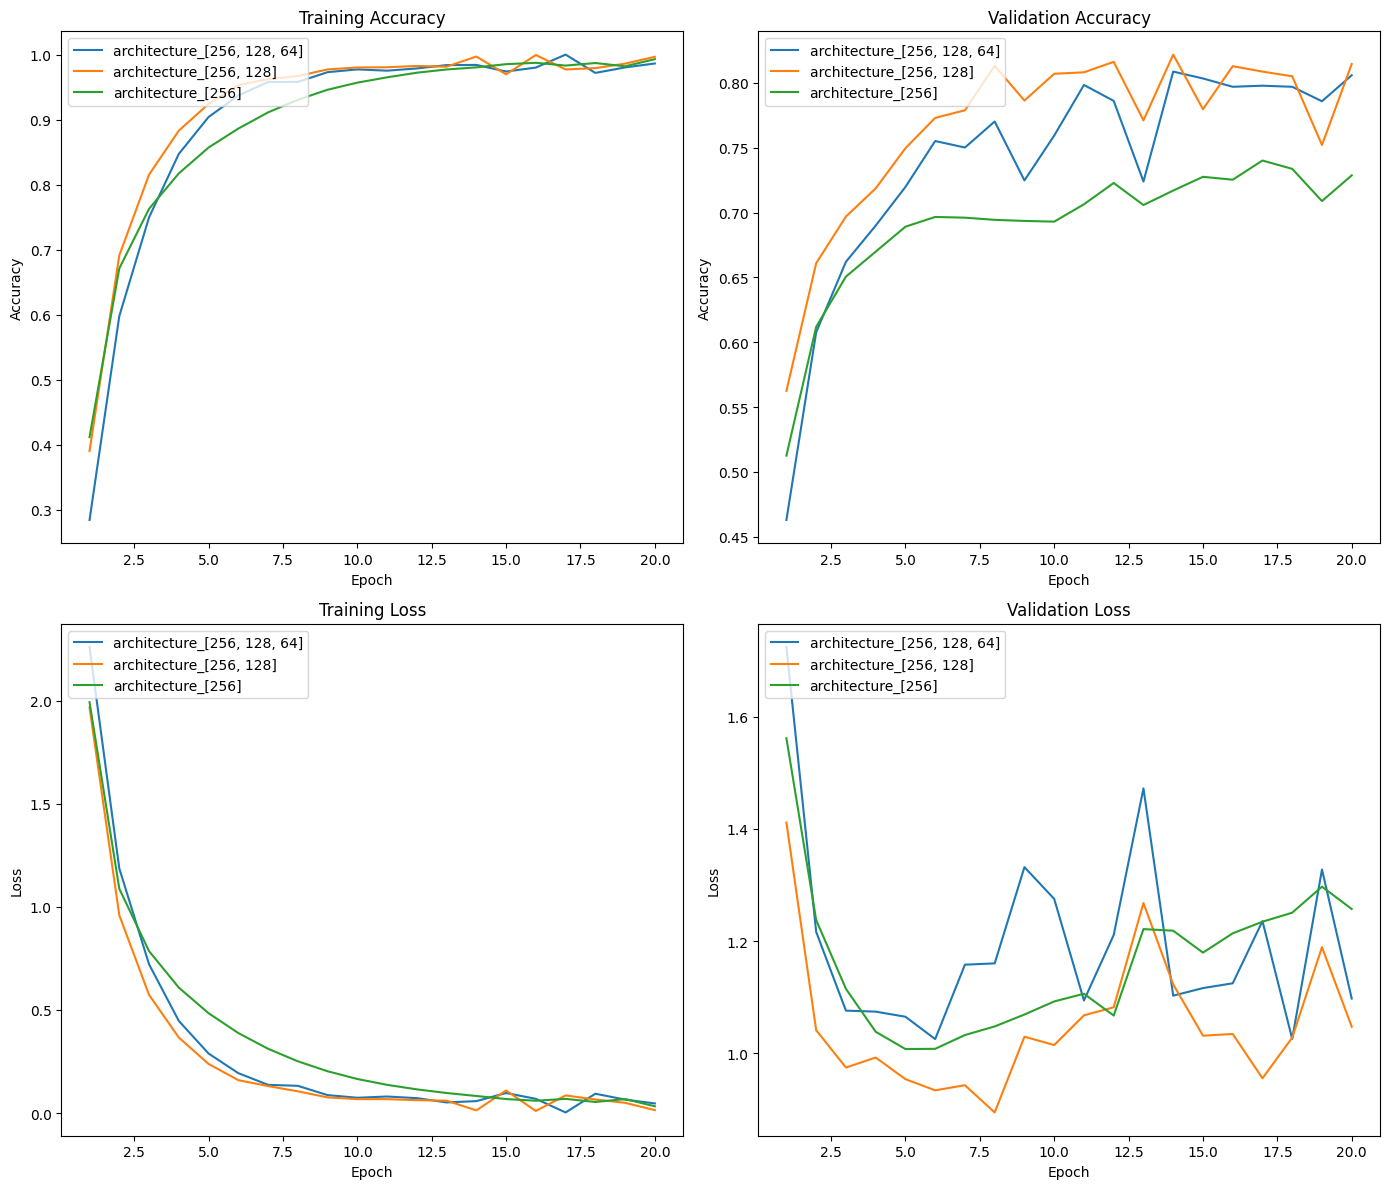

In [116]:
# See the performance for different architectures
plot_comparison(histories)

**Observation**:
- The simplest model, which has only one hidden layer, underperforms compared to the two deeper DNNs. It shows lower validation accuracy and higher loss, indicating that it struggles to capture the complexity of the data.
- The deepest network performs similarly to the model with two hidden layers. However, since the two-hidden-layer model is less complex and smaller in size, it is more efficient while delivering comparable performance. Therefore, the model with two hidden layers is the preferred choice.
- Thus I will use the second achitecture which contain two hidden layer with 256 and 128 neurons in the following process

#### Try different activation function

In this section we will try different activation function including relu, elu, and selu

In [117]:
from tensorflow.keras.layers import Dense, LeakyReLU

# Define different activation functions to compare
activations = ['relu', 'elu', 'selu']

# Store histories for comparison
histories_act = {}

# Loop through each activations
for act in activations:
    set_seed(42)
    model = create_dnn_model([256, 128], activation=act)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train, y_train,
        epochs=20,
        validation_data=(X_val, y_val)
    )
    
    # Store history
    histories_act[f"activation_{act}"] = history

c:\Users\billz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2504 - loss: 2.5190 - val_accuracy: 0.5625 - val_loss: 1.4115
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6466 - loss: 1.0926 - val_accuracy: 0.6609 - val_loss: 1.0412
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7942 - loss: 0.6419 - val_accuracy: 0.6969 - val_loss: 0.9746
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8698 - loss: 0.4033 - val_accuracy: 0.7186 - val_loss: 0.9924
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9162 - loss: 0.2630 - val_accuracy: 0.7496 - val_loss: 0.9539
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9496 - loss: 0.1709 - val_accuracy: 0.7730 - val_loss: 0.9339
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9675 - loss: 0.1202 - val_accuracy: 0.7789 - val_loss: 0.9431
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9695 - loss: 0.0976 - val_accuracy: 0.

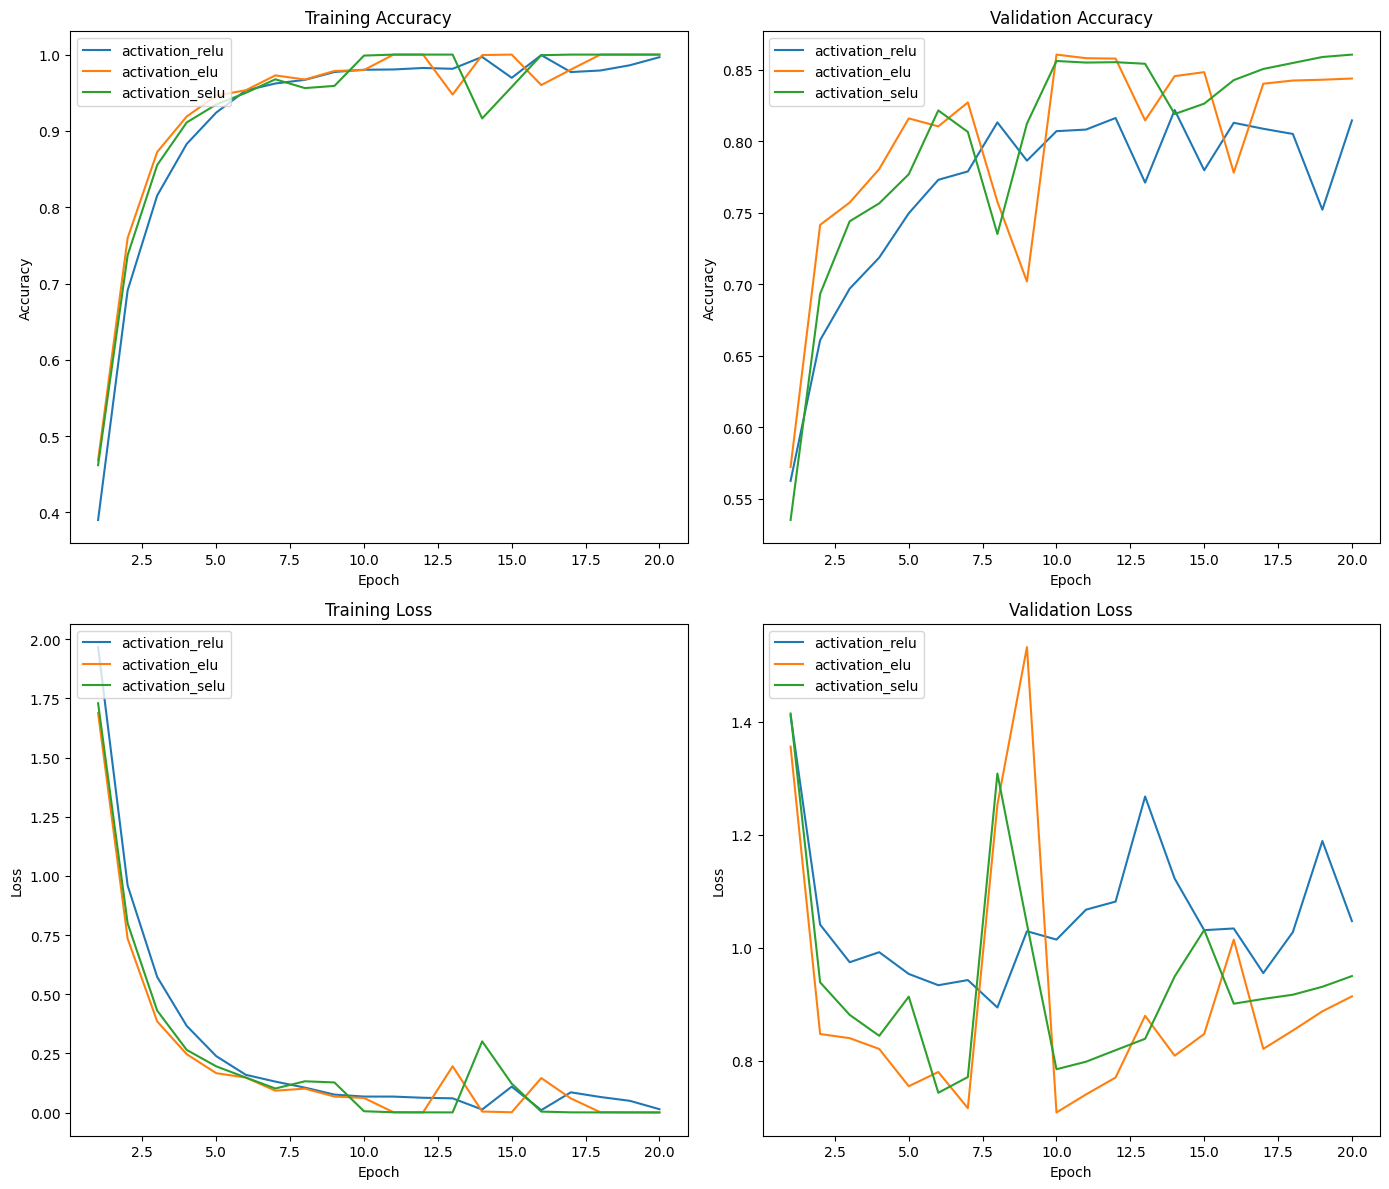

In [118]:
plot_comparison(histories_act)

**Observation**:
- In the above chart, we found elu and selu have better validation accuracy and lower loss, and selu has slightly better accuracy than elu. That may bacause elu improves upon relu by allowing for negative values, which helps in mitigating the "dying relu" problem and promotes better learning dynamics. selu, a self-normalizing variant of elu, further enhances performance by maintaining the mean and variance of activations close to zero and one, respectively.
- Thus, I will use selu in the rest of process

#### Try to optimize learning rate

Now we try to explore and optimize the suitable learning rate, we will still use adam as optimizer here, but we will try three different learning rate.


In [120]:
# Define different initial learning rates to test
learning_rates = [0.0005, 0.001, 0.01]

# Store histories for comparison
histories_lr = {}

# Loop through each learning rate using SGD as the optimizer
for lr in learning_rates:
    model = create_dnn_model([256, 128], activation="selu")
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train, y_train,
        epochs=20,
        validation_data=(X_val, y_val)
    )
    
    # Store history
    histories_lr[f"learning rate_{lr}"] = history

c:\Users\billz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3419 - loss: 2.2473 - val_accuracy: 0.5798 - val_loss: 1.4075
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7150 - loss: 0.8883 - val_accuracy: 0.6517 - val_loss: 1.1469
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8231 - loss: 0.5526 - val_accuracy: 0.7117 - val_loss: 0.9526
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8906 - loss: 0.3455 - val_accuracy: 0.7147 - val_loss: 0.9455
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9320 - loss: 0.2336 - val_accuracy: 0.7348 - val_loss: 0.9550
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9547 - loss: 0.1579 - val_accuracy: 0.7418 - val_loss: 0.9465
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9662 - loss: 0.1200 - val_accuracy: 0.7448 - val_loss: 1.0666
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9722 - loss: 0.0997 - val_accuracy: 0.

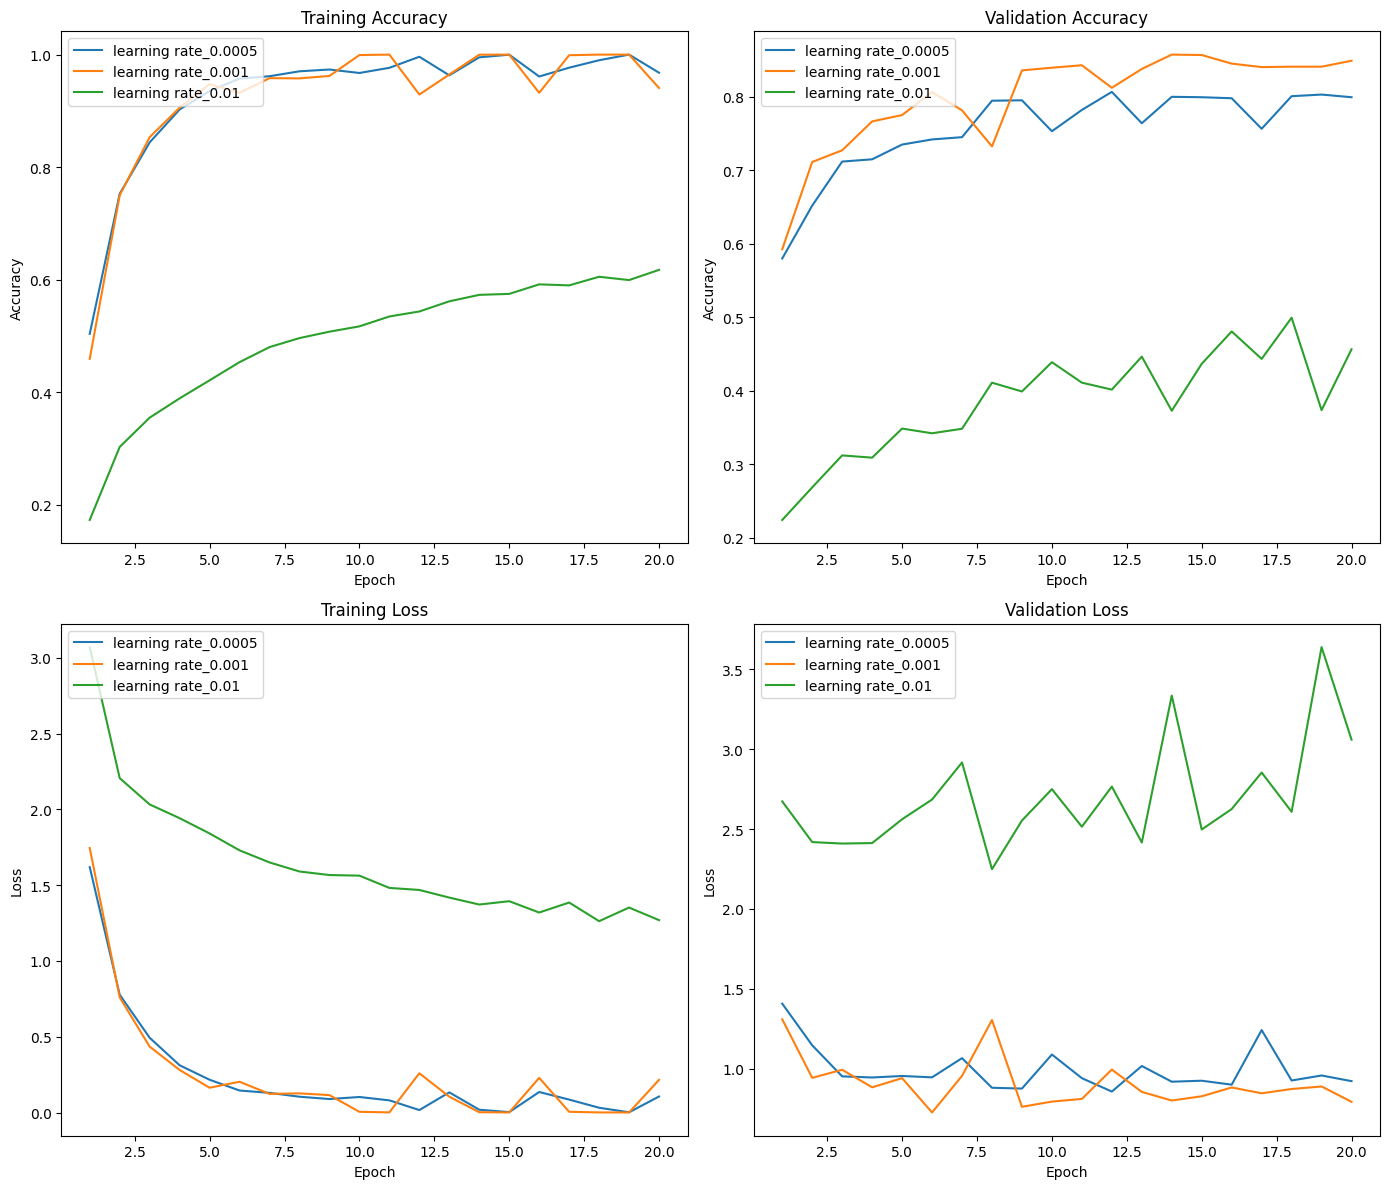

In [121]:
plot_comparison(histories_lr)

**Observation**:
- I found learning rate of 0.001 slightly outperforms 0.0005 in validation accuracy, while 0.01 significantly underperforms. Therefore, the learning rate of 0.001 strikes the optimal balance, offering the best validation performance and ensuring effective training.
- Thus, I will use 0.001 learning rate in the following process

#### Try different Optimizer

In [122]:
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, SGD

# Define different optimizers to test
optimizers = {
    "Adam": Adam(learning_rate=0.001),
    "Nadam": Nadam(learning_rate=0.001),
    "RMSprop": RMSprop(learning_rate=0.001),
    "SGD": SGD(learning_rate=0.001)
}

# Store histories for comparison
histories_optimizer = {}

# Loop through each optimizer
for opt_name, optimizer in optimizers.items():
    # Create and compile the model
    model = create_dnn_model([256, 128], activation="selu")
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=20,
        validation_data=(X_val, y_val)
    )
    
    # Store history
    histories_optimizer[opt_name] = history


Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3077 - loss: 2.4338 - val_accuracy: 0.5206 - val_loss: 1.4687
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7033 - loss: 0.8930 - val_accuracy: 0.6801 - val_loss: 1.0151
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8401 - loss: 0.4772 - val_accuracy: 0.7407 - val_loss: 0.8480
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9084 - loss: 0.2681 - val_accuracy: 0.7697 - val_loss: 0.8491
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9311 - loss: 0.2002 - val_accuracy: 0.7066 - val_loss: 1.1623
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9442 - loss: 0.1698 - val_accuracy: 0.7691 - val_loss: 0.9897
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9599 - loss: 0.1248 - val_accuracy: 0.7814 - val_loss: 0.9414
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9709 - loss: 0.0923 - val_accuracy: 0.

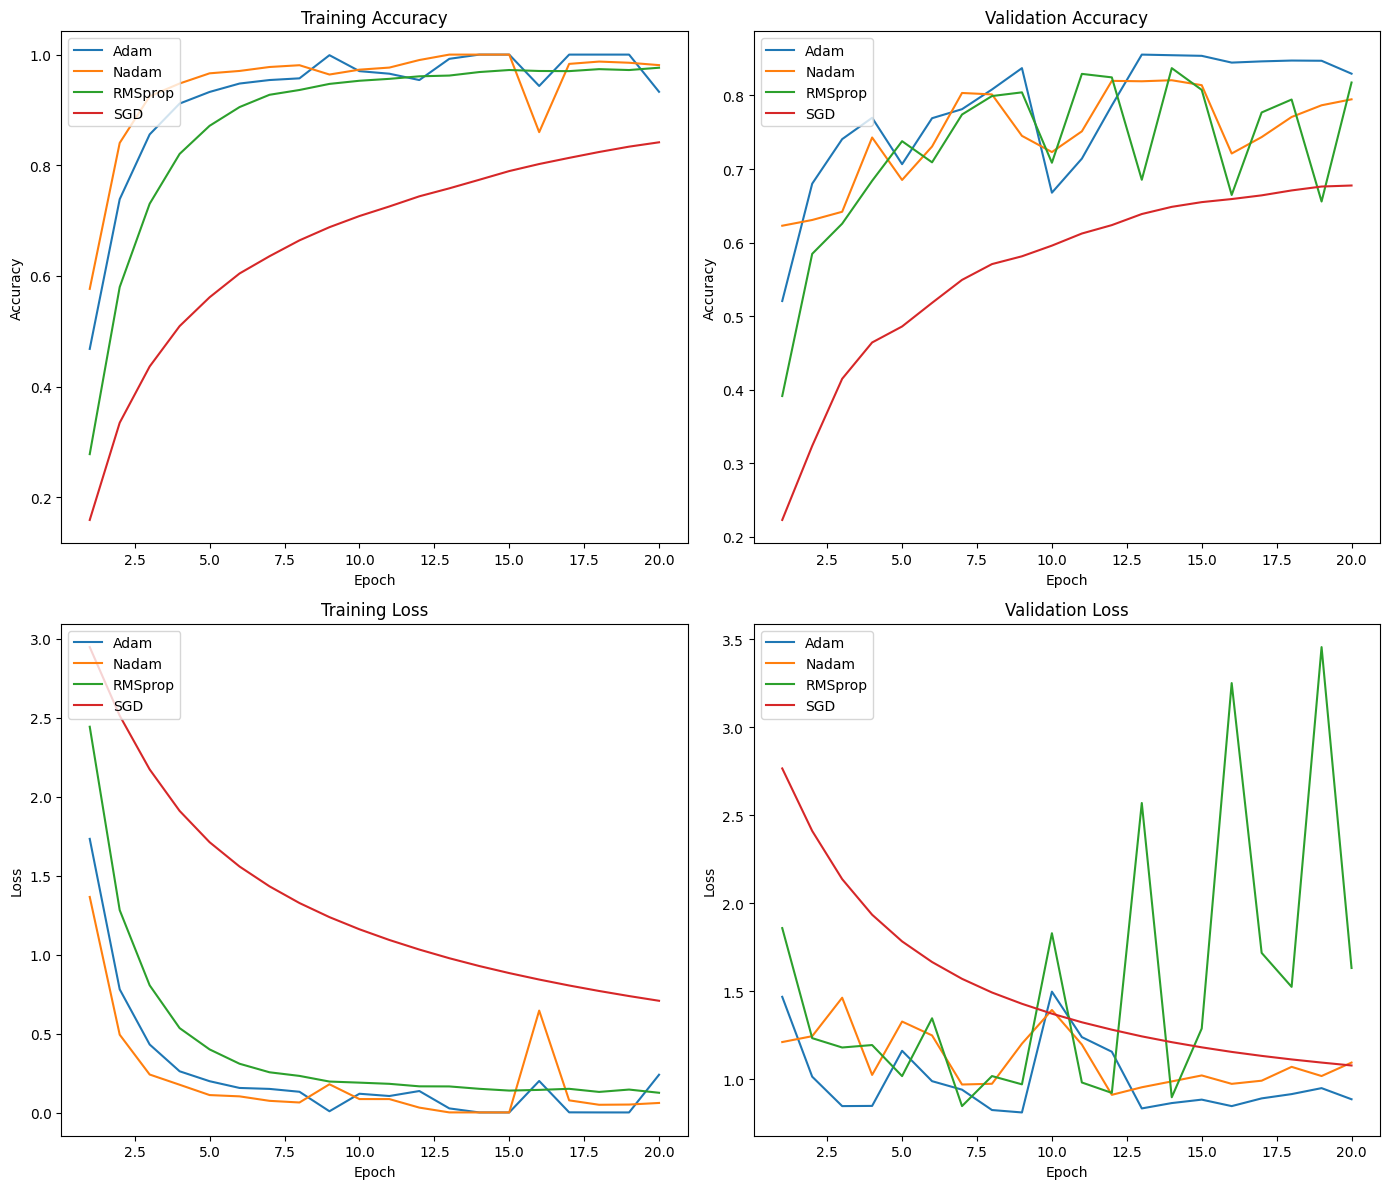

In [123]:
plot_comparison(histories_optimizer)

**Observation**:
- From the above chart we can see Adam and Nadam optimizers achieved the best validation accuracy, indicating strong performance. In contrast, RMSprop exhibited significant fluctuations in both accuracy and loss, suggesting instability during training. SGD, while providing smoother curves, demonstrated the worst performance with slower convergence, resulting in the lowest validation accuracy
- Thus, I will use adam as optimizer in the following process

#### Try kerneal intializer

In [130]:
from tensorflow.keras.initializers import GlorotUniform, LecunNormal

# Define initializers
initializers = {
    "LeCunNormal": LecunNormal(),
    "GlorotUniform": GlorotUniform()
}

# Store histories for comparison
histories_initializer = {}

# Loop through each initializer
for init_name, initializer in initializers.items():
    # Create and compile the model with the specified initializer
    model = create_dnn_model([256, 128], activation="selu", kernel_initializer=initializer)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=20,
        validation_data=(X_val, y_val)
    )
    
    # Store history
    histories_initializer[init_name] = history


c:\Users\billz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3017 - loss: 2.3763 - val_accuracy: 0.5482 - val_loss: 1.4249
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7097 - loss: 0.8872 - val_accuracy: 0.6974 - val_loss: 0.9527
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8456 - loss: 0.4628 - val_accuracy: 0.7457 - val_loss: 0.8285
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8976 - loss: 0.3018 - val_accuracy: 0.7758 - val_loss: 0.8407
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9412 - loss: 0.1751 - val_accuracy: 0.8034 - val_loss: 0.7879
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9527 - loss: 0.1431 - val_accuracy: 0.6966 - val_loss: 1.3477
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9380 - loss: 0.1883 - val_accuracy: 0.8045 - val_loss: 0.8762
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9573 - loss: 0.1337 - val_accuracy: 0.

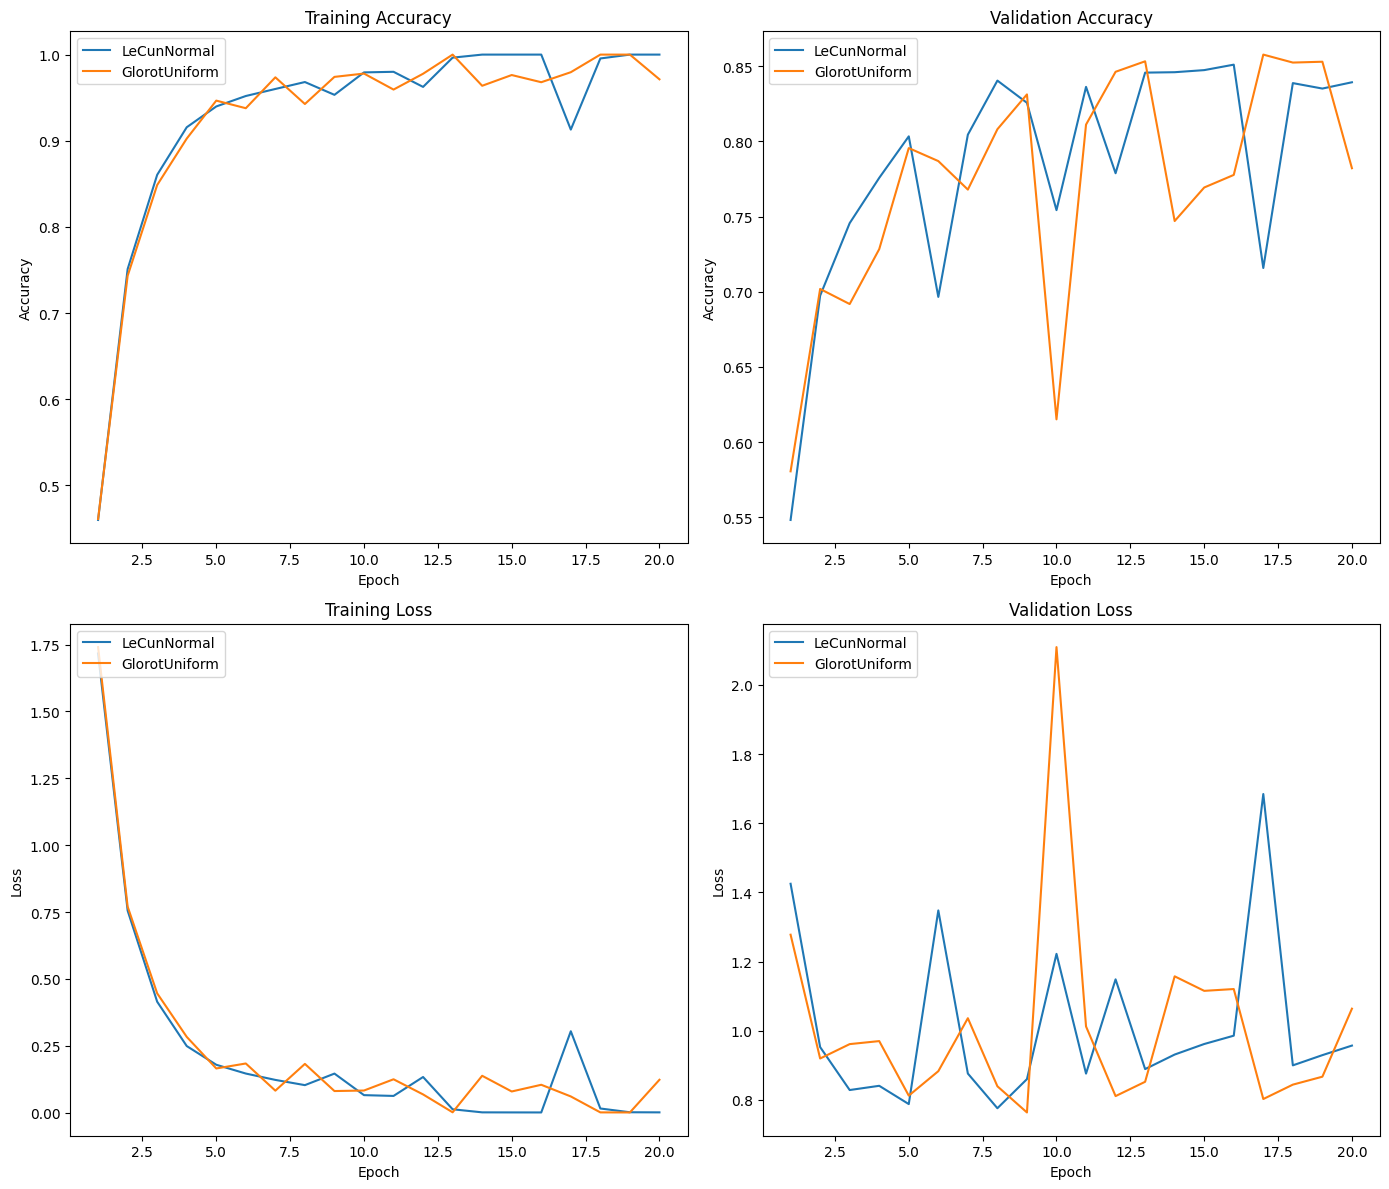

In [131]:
plot_comparison(histories_initializer)

**Observation**:
- LeCun Normal initialization performs similarly to Glorot Uniform but with less fluctuation in validation accuracy and loss. This stability is due to LeCun Normal’s design, which is tailored for SELU activation functions. It maintains consistent variance of activations by scaling weights appropriately, supporting SELU’s self-normalizing properties and ensuring more stable and effective training.
- Thus, I will use Lecun Normal initialization

#### Try L2 regularization

In [133]:
from tensorflow.keras import regularizers

def create_dnn_model_regularize(neurons_per_layer, l2_lambda=0.01):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 1), name='flatten'))
    
    for i, neurons in enumerate(neurons_per_layer):
        model.add(Dense(
            neurons, 
            activation="selu", 
            kernel_initializer="lecun_normal",
            kernel_regularizer=regularizers.l2(l2_lambda),  # Apply L2 regularization
            name=f'dense_{i+1}'
        ))
    
    model.add(Dense(24, activation='softmax', kernel_initializer="lecun_normal", name='output'))
    
    return model

# Define L2 regularization strengths to test
l2_strengths = [0.0, 0.01, 0.1]  # No regularization, mild regularization, strong regularization

# Store histories for comparison
histories_regularization = {}

# Loop through each regularization strength
for l2_lambda in l2_strengths:
    # Create and compile the model with the specified L2 regularization strength
    model = create_dnn_model_regularize([256, 128], l2_lambda=l2_lambda)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=20,
        validation_data=(X_val, y_val),
        verbose=1
    )
    
    # Store history
    histories_regularization[f"L2_{l2_lambda}"] = history

Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.3076 - loss: 2.3426 - val_accuracy: 0.5457 - val_loss: 1.4464
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7088 - loss: 0.8790 - val_accuracy: 0.6891 - val_loss: 0.9870
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8442 - loss: 0.4618 - val_accuracy: 0.7493 - val_loss: 0.7956
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9164 - loss: 0.2539 - val_accuracy: 0.7708 - val_loss: 0.7972
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9411 - loss: 0.1802 - val_accuracy: 0.8001 - val_loss: 0.7778
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9506 - loss: 0.1456 - val_accuracy: 0.8165 - val_loss: 0.7094
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9769 - loss: 0.0742 - val_accuracy: 0.8001 - val_loss: 0.8395
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9797 - loss: 0.0660 - val_accuracy: 0.

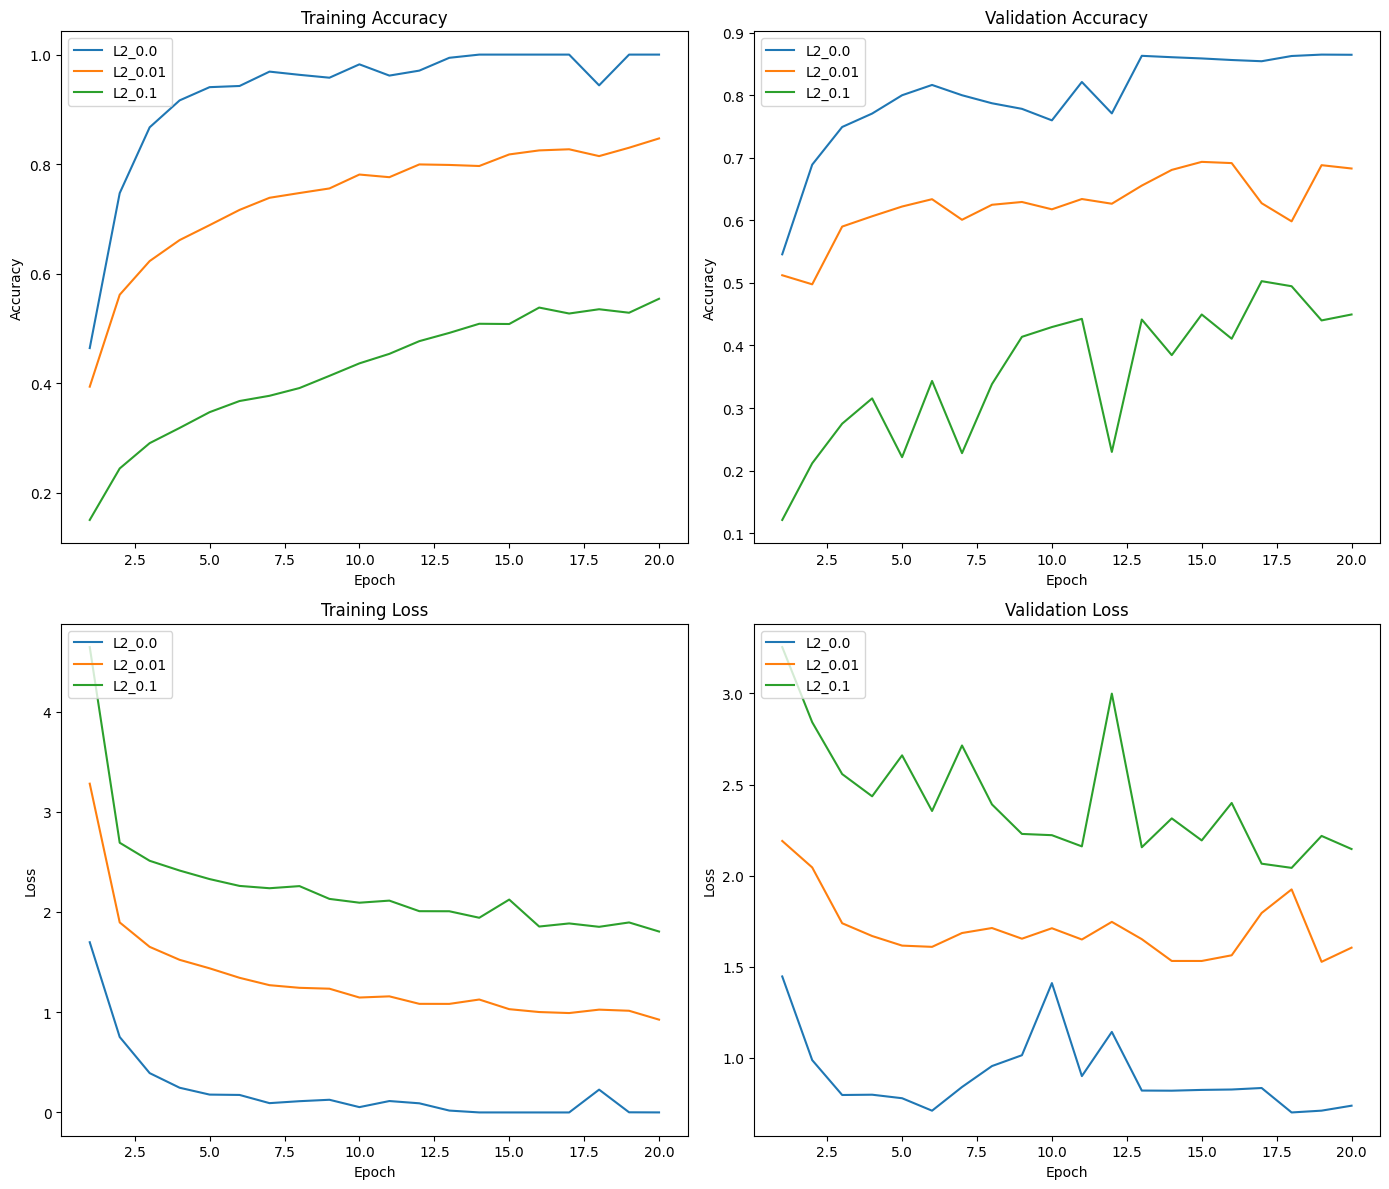

In [134]:
plot_comparison(histories_regularization)

**Observation**:
- Models with no L2 regularization performed the best in terms of validation accuracy and loss. In contrast, L2 regularization with strengths of 0.01 and 0.1 resulted in slower convergence and did not significantly improve validation performance. These stronger regularization strengths did not provide notable benefits and, in some cases, hindered the model’s effectiveness
- So I will not use any L2 regularization in this case

#### Try earlystopping and learning rate scheduler

In [137]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=3, min_lr=0.00001)

# List of callback scenarios to test
callbacks_scenarios = {
    "With reduce lr": [early_stopping, reduce_lr],
    "Without reduce lr": [early_stopping]
}

# Store histories for comparison
histories_callbacks = {}

# Loop through each callbacks scenario
for scenario_name, callbacks in callbacks_scenarios.items():
    # Create and compile the model
    model = create_dnn_model([256, 128], activation="selu", kernel_initializer="lecun_normal")
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model with the current callbacks scenario
    history = model.fit(
        X_train, y_train,
        epochs=20,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )
    
    # Store history
    histories_callbacks[scenario_name] = history

c:\Users\billz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3090 - loss: 2.3636 - val_accuracy: 0.6035 - val_loss: 1.2500 - learning_rate: 0.0010
Epoch 2/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7179 - loss: 0.8535 - val_accuracy: 0.6969 - val_loss: 0.9940 - learning_rate: 0.0010
Epoch 3/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8487 - loss: 0.4499 - val_accuracy: 0.7501 - val_loss: 0.8019 - learning_rate: 0.0010
Epoch 4/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9030 - loss: 0.2904 - val_accuracy: 0.7691 - val_loss: 0.8618 - learning_rate: 0.0010
Epoch 5/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9468 - loss: 0.1598 - val_accuracy: 0.7842 - val_loss: 0.8740 - learning_rate: 0.0010
Epoch 6/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9491 - loss: 0.1507 - val_accuracy: 0.7945 - val_loss: 0.7927 - learning_rate: 0.0010
Epoch 7/30
858/858 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9768 - loss: 0.0759 - 

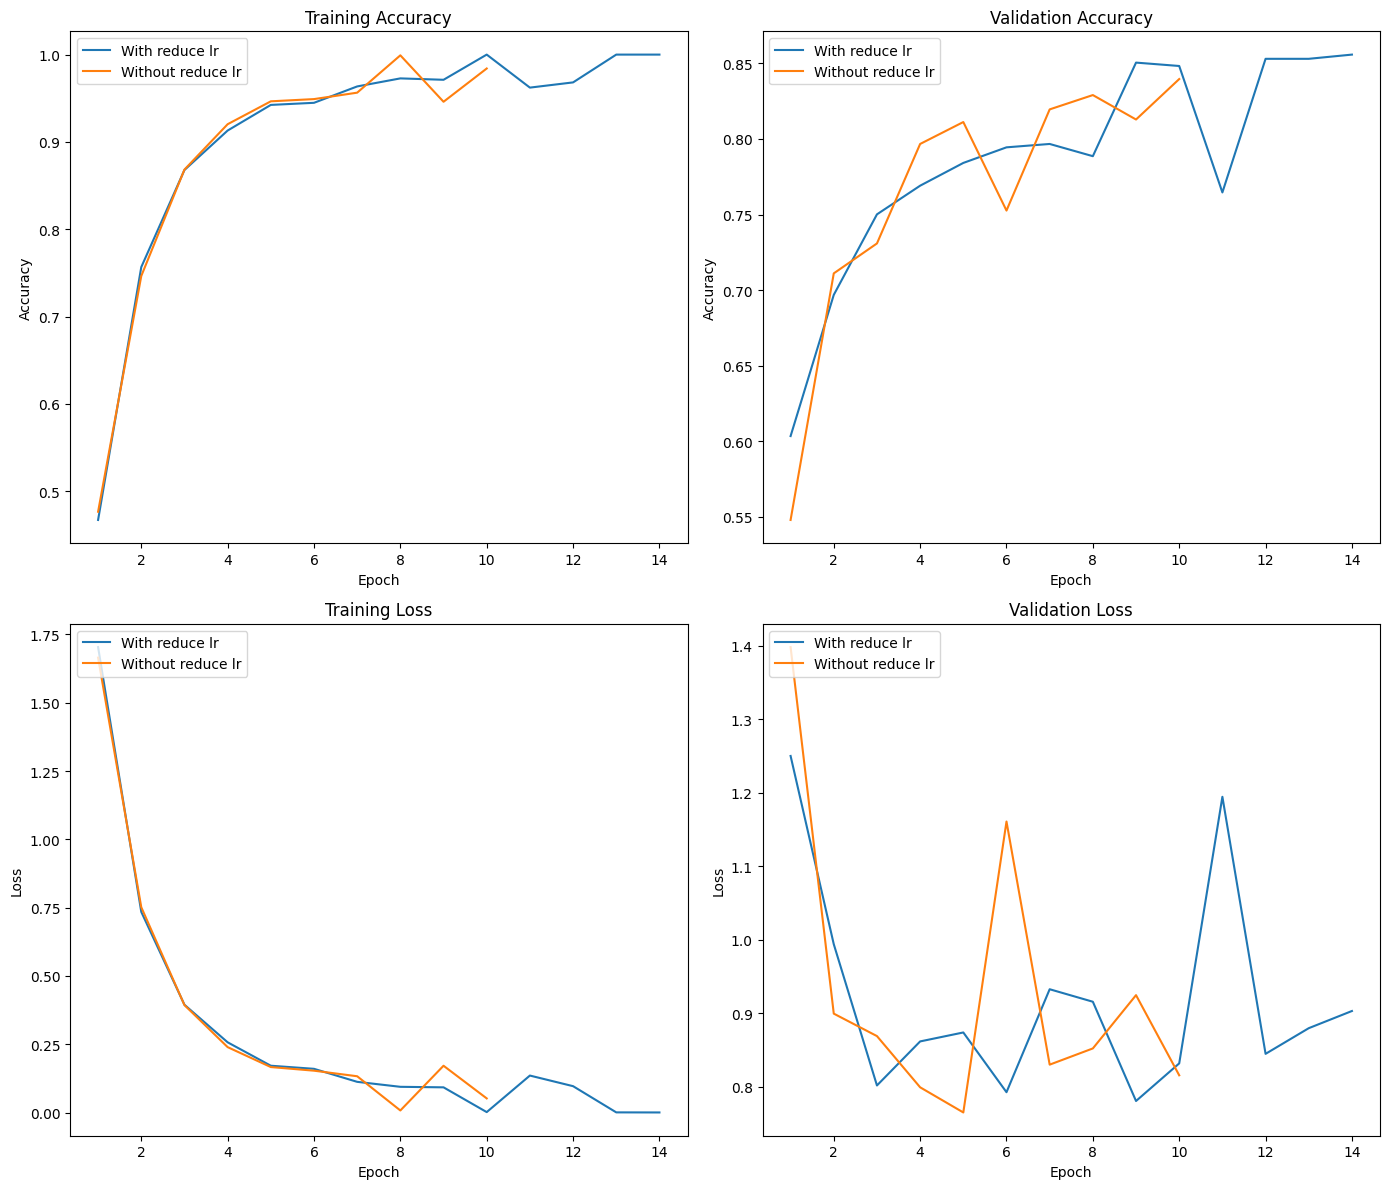

In [138]:
plot_comparison(histories_callbacks)

**Observation**:
- Early stopping helps save training time by halting the process when there is no improvement in validation loss. Additionally, using learning rate reduction on plateau results in better validation accuracy compared to training without it, as it adapts the learning rate to improve model performance during training
- So I will use early stopping and learning rate reduction

There are something else we can do but I will stop here for following reasons:
- I didn't try dropout: dropout introduces randomness by deactivating a fraction of neurons during training. This randomness can disrupt the self-normalizing behavior of SELU, potentially reducing its effectiveness.
- I didn't try bacth normalization: Batch normalization normalizes the activations for each mini-batch, which can disrupt the normalization properties that SELU provides. This disruption can negate the benefits of SELU's self-normalization, potentially leading to worse performance

#### Conclusion after optimizing DNN model

After optimizing the DNN, the settings I use in the end are:
- Architecture: 2 hidden layers with 256 and 128 neuron each
- Activation function for dense layer: SELU
- Learning rate: 0.001
- Optimizer: Adam
- Kernel initializer: Lecun Normal initialization
- Callbacks: Early stopping and ReduceLROnPlateau
- No dropout, batch normalization and l2 regularization

In this part, it cost me 3+3+3+4+2+3+2=20 runs

### Optimize CNN model

In [142]:
def create_cnn_model(conv_layers, dense_units, activation='relu', kernel_initializer='glorot_uniform'):
    model = Sequential()
    
    # Input layer
    model.add(Conv2D(conv_layers[0], (3, 3), activation=activation, input_shape=(32, 32, 1), kernel_initializer=kernel_initializer, name='conv_1'))
    model.add(MaxPooling2D((2, 2), name='max_pool_1'))
    
    # Additional convolutional layers
    for i in range(1, len(conv_layers)):
        model.add(Conv2D(conv_layers[i], (3, 3), activation=activation, kernel_initializer=kernel_initializer, name=f'conv_{i+1}'))
        model.add(MaxPooling2D((2, 2), name=f'max_pool_{i+1}'))
    
    # Flatten and dense layers
    model.add(Flatten(name='flatten'))
    for i, units in enumerate(dense_units):
        model.add(Dense(units, activation=activation, kernel_initializer=kernel_initializer, name=f'dense_{i+1}'))
    
    model.add(Dense(24, activation='softmax', kernel_initializer=kernel_initializer, name='output'))
    
    return model

In [146]:
# Different CNN architectures to explore
architectures = [
    {'conv_layers': [16, 16], 'dense_units': [64]},
    {'conv_layers': [32, 64, 128], 'dense_units': [256]},
    {'conv_layers': [16, 32, 64], 'dense_units': [128]},
]

# Store histories for comparison
histories_architectures_cnn = {}

# Loop through each architecture
for arch_name, arch_params in enumerate(architectures, start=1):
    model = create_cnn_model(
        conv_layers=arch_params['conv_layers'],
        dense_units=arch_params['dense_units']
    )
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        X_train, y_train,
        epochs=20,
        validation_data=(X_val, y_val),
        verbose=1 
    )
    
    histories_architectures_cnn[f"Architecture_{arch_name}"] = history


c:\Users\billz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3328 - loss: 2.2586 - val_accuracy: 0.7423 - val_loss: 0.8404
Epoch 2/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8828 - loss: 0.3876 - val_accuracy: 0.8109 - val_loss: 0.5730
Epoch 3/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9704 - loss: 0.1162 - val_accuracy: 0.8567 - val_loss: 0.5429
Epoch 4/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9953 - loss: 0.0327 - val_accuracy: 0.8673 - val_loss: 0.5662
Epoch 5/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9996 - loss: 0.0116 - val_accuracy: 0.8463 - val_loss: 0.7130
Epoch 6/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9944 - loss: 0.0182 - val_accuracy: 0.8762 - val_loss: 0.5642
Epoch 7/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.8776 - val_loss: 0.6068
Epoch 8/20
858/858 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.

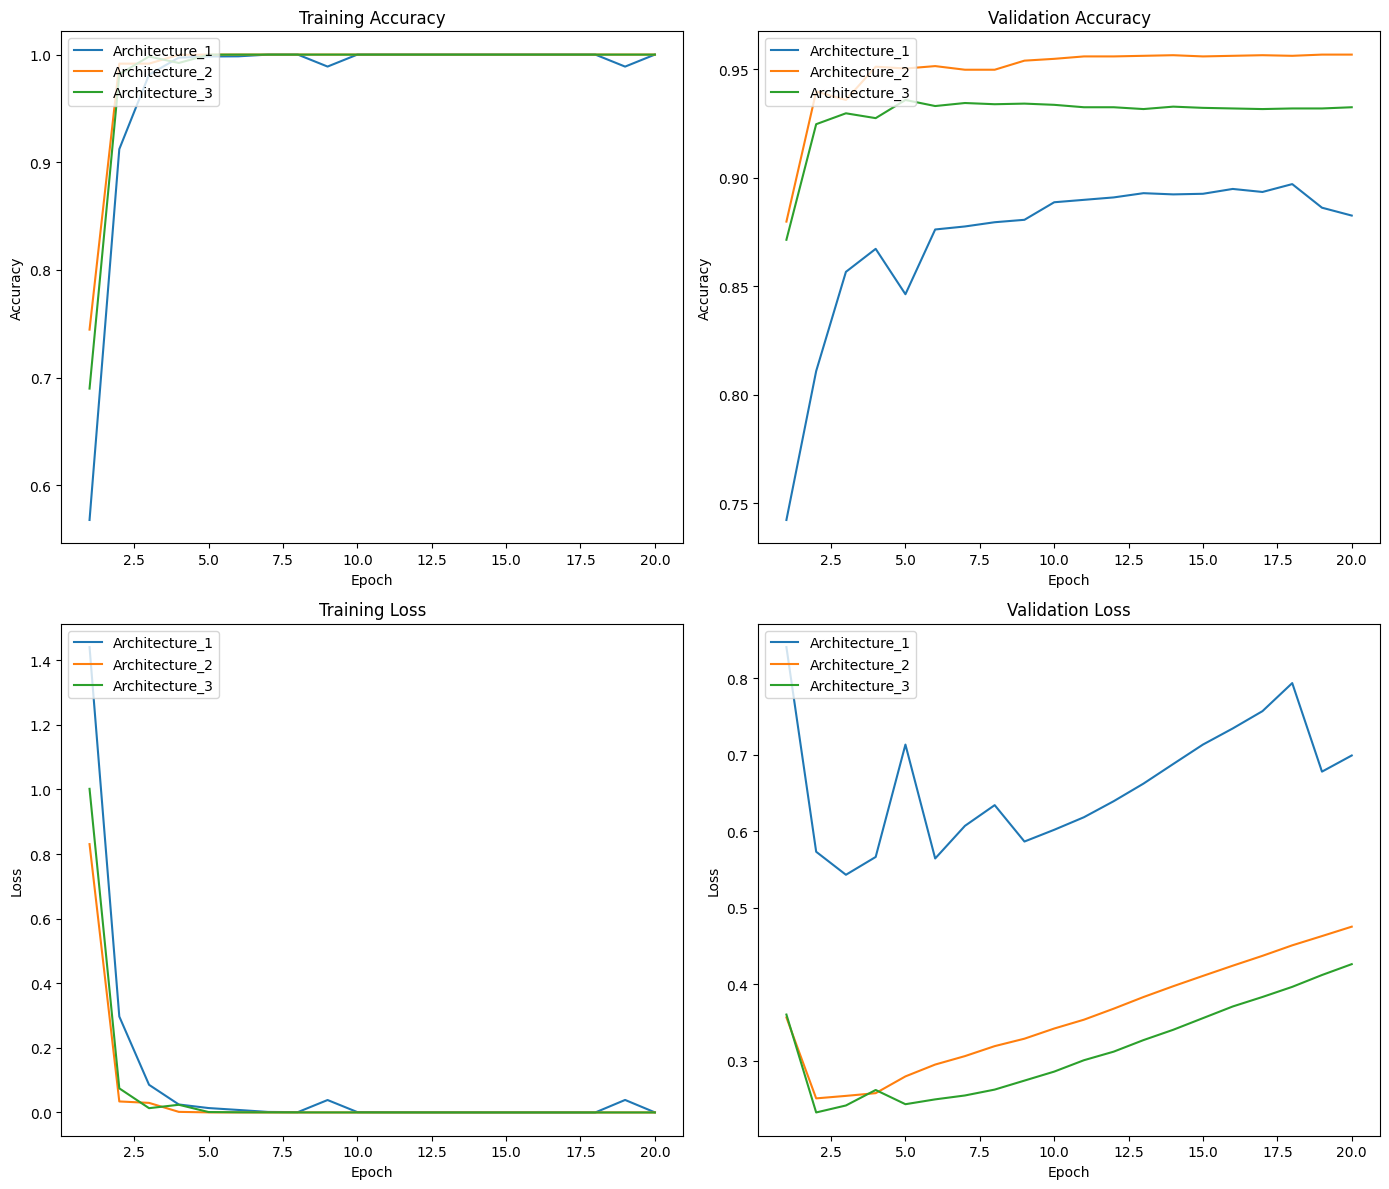

In [147]:
plot_comparison(histories_architectures_cnn)

## 3. Comparison, selection of best model & report final results